In [62]:
from sklearn.neighbors import KNeighborsClassifier as kNC
from sklearn.tree import DecisionTreeClassifier as DTC

# Boosting
from sklearn.ensemble import AdaBoostClassifier as AdaC
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

import numpy as np

# import dataset packages
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

# import from project files
from utils import plot_2d, plot_classifier_boundary

## Dataset Generation ## 

### Decision Trees ###
Advantages:
+ Good with High Level Data: e.g. age, income

Disadvantages:
- Bad with Low Level Data: data with many predictors/inputs
- Trees can overfit: Overfitting increases with depth of tree


### Tree Boosting (ADA) ###

- gradient boosting may not be a good choice if you have a lot of noise, as it can result in overfitting

In [63]:
def data_dt():

    dt_X, dt_y = make_blobs(
        n_samples=[250, 50], 
        centers=[(3,5),(6,5)],             
        n_features=2, 
        cluster_std=[3, 1],
        random_state=42, 
        shuffle=False)

    return dt_X, dt_y

In [64]:
def data_tb():

    # tb_X, tb_y = make_blobs(
    #     n_samples=[700, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)
    
    # tb_X, tb_y = make_blobs(
    #     n_samples=[200, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=4, 
    #     # cluster_std=[2, 1],
    #     random_state=1, 
    #     shuffle=False)

    tb_X, tb_y = make_blobs(
        n_samples=[250, 250], 
        centers=[(5,5),(6,5)],             
        n_features=2, 
        cluster_std=[1, 1],
        random_state=42, 
        )

    return tb_X, tb_y

DT dataset shape X: (300, 2)
DT dataset shape Y: (300,)
DT dataset example row X: [4.49014246 4.5852071 ]
DT dataset example row Y: 0


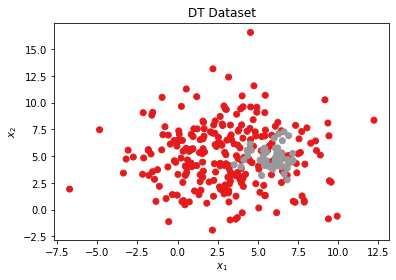

DT dataset shape X train: (201, 2)
DT dataset shape X test: (99, 2)


In [65]:
# Decision Tree data generation and splitup
dt_X, dt_y = data_dt()
print('DT dataset shape X:', dt_X.shape)
print('DT dataset shape Y:', dt_y.shape)
print('DT dataset example row X:', dt_X[0])
print('DT dataset example row Y:', dt_y[0])
plot_2d(dt_X, dt_y, 'DT Dataset')

dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=.33, random_state=42)
print('DT dataset shape X train:', dt_X_train.shape)
print('DT dataset shape X test:', dt_X_test.shape)

TB dataset shape X: (500, 2)
TB dataset shape Y: (500,)
TB dataset example row X: [5.47727698 6.04900923]
TB dataset example row Y: 1


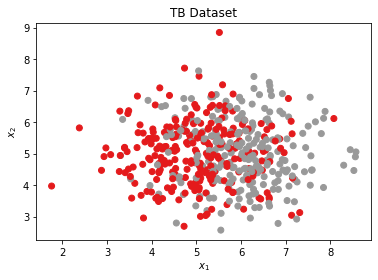

In [66]:
# TB data generation and splitup
tb_X, tb_y = data_tb()
print('TB dataset shape X:', tb_X.shape)
print('TB dataset shape Y:', tb_y.shape)
print('TB dataset example row X:', tb_X[0])
print('TB dataset example row Y:', tb_y[0])
plot_2d(tb_X, tb_y, 'TB Dataset')

tb_X_train, tb_X_test, tb_y_train, tb_y_test = train_test_split(tb_X, tb_y, test_size=.33, random_state=42)

## Evaluation and Plotting Methods ##

In [67]:
# EVALUATION

# method to get accuracy of model
def model_score(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([acc(y_test,y_test_pred),
                     acc(y_train,y_train_pred)])

# ktb Evaluation 
def tb_classifier_score(param,X_train,y_train,X_test,y_test):
    # print(k)
    model=AdaC().fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([ 1 - acc(y_test,y_test_pred),
                      1 - acc(y_train,y_train_pred)])


# Decision Tree Evaluation
def dt_classifier_score(X_train,y_train,X_test,y_test, max_depth=None, min_samples_split=2):
    # print(max_depth)
    model=DTC(
        criterion='entropy', 
        max_depth=max_depth, 
        min_samples_split=min_samples_split
        )
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([ 1 - acc(y_test,y_test_pred),
                      1 - acc(y_train,y_train_pred)])

#  Underfitting – Validation and training error high
#  Overfitting – Validation error is high, training error low
#  Good fit – Validation error low, slightly higher than the training error
#  Unknown fit - Validation error low, training error 'high'


In [68]:
# PLOTTING

# plot errors
def plot_test_training_err(param_values, test_err, train_err, title, hyperparam):
    plt.xlabel('$' + hyperparam + '$')
    plt.ylabel('$classification~~error$')
    # plt.ylabel('$score$')
    plt.title(title)
    plt.plot(param_values,test_err,color='red')
    plt.plot(param_values,train_err,color='blue')
    plt.legend(['test','train']);
    plt.show()

## Hyperparameters ##

In [69]:
# Hyperparameters

# DT
criterion = 'entropy'
# min_samples_split best between [2, 40] (see https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
# if value too small trees tend to overfit
# Imbalanced class problem: because then regions in which the minority class will be in majority 
# will be very small so min_samples_split should be lower
min_samples_split_tb = 2
min_samples_split_dt = 2
samples_values = np.arange(2, 60, 2)
max_depth_tb = None
max_depth_dt = None
depth_values = np.arange(1, 60, 5)

# Tree Boosting ADA

## Dataset DT ##
### Comprare Performance DT and TB ###

DT score on DT dataset: 0.96


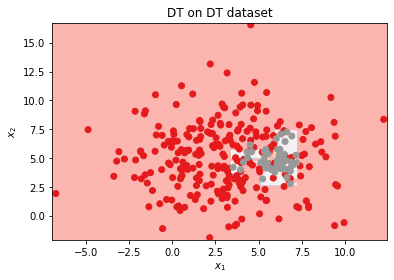

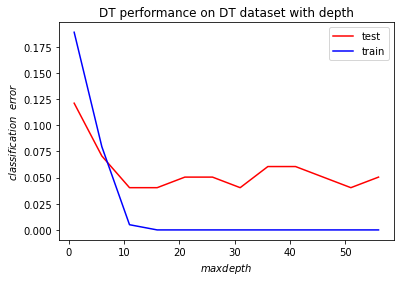

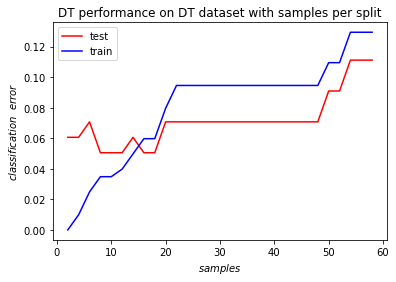

In [70]:
# Decision Trees

dtree=DTC(criterion=criterion, max_depth=max_depth_dt, min_samples_split=min_samples_split_dt)
dtree.fit(dt_X_train, dt_y_train)

print('DT score on DT dataset: %.2f' % (dtree.score(dt_X_test, dt_y_test)))

plot_classifier_boundary(dtree, dt_X, dt_y, title='DT on DT dataset')
# plot_tree(dtree)

# DT Hyperparam Tuning
errors = map(lambda depth: dt_classifier_score(
    dt_X_train, dt_y_train, 
    dt_X_test, dt_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_dt), depth_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(depth_values, test_error, train_error, 
title='DT performance on DT dataset with depth', 
hyperparam='max depth')
# DT Hyperparam Tuning
errors = map(lambda sample: dt_classifier_score(
    dt_X_train, dt_y_train, 
    dt_X_test, dt_y_test, 
    max_depth=max_depth_dt, 
    min_samples_split=sample), samples_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(samples_values, test_error, train_error, 
title='DT performance on DT dataset with samples per split', 
hyperparam='samples')

TB score on DT dataset: 0.91


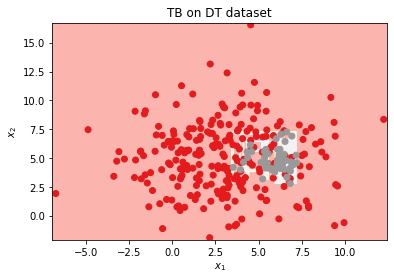

In [71]:
# TB

tboost = AdaC()
tboost.fit(dt_X_train, dt_y_train)
print('TB score on DT dataset: %.2f' % (tboost.score(dt_X_test, dt_y_test)))

plot_classifier_boundary(tboost, dt_X, dt_y, title='TB on DT dataset')

# errors = map(lambda k: tb_classifier_score(k, dt_X_train, dt_y_train, dt_X_test, dt_y_test), k_values)
# errors = list(errors)
# test_error = [x[0] for x in errors]
# train_error = [x[1] for x in errors]

# plot_test_training_err(k_values, test_error, train_error, 
# title='TB performance on DT dataset with k', 
# hyperparam='k')

## Dataset TB ##
### Compare Performance DT and TB ###

DT score on TB dataset: 0.68


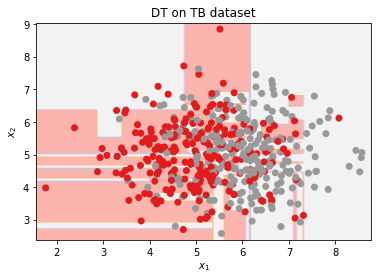

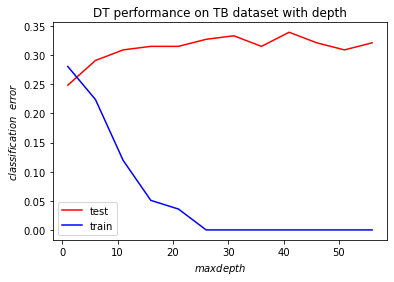

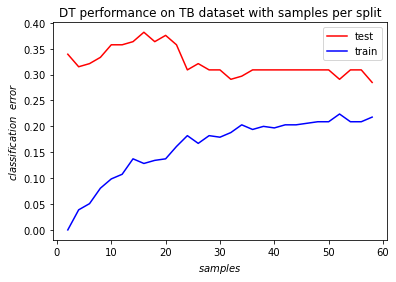

In [72]:
# Decision Trees

dtree=DTC(criterion=criterion, max_depth=max_depth_tb, min_samples_split=min_samples_split_tb)
dtree.fit(tb_X_train, tb_y_train)

print('DT score on TB dataset: %.2f' % (dtree.score(tb_X_test, tb_y_test)))

plot_classifier_boundary(dtree, tb_X, tb_y, title='DT on TB dataset')
# plot_tree(dtree)

# DT Hyperparam Tuning
errors = map(lambda depth: dt_classifier_score(
    tb_X_train, tb_y_train, 
    tb_X_test, tb_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_tb), depth_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(depth_values, test_error, train_error, 
title='DT performance on TB dataset with depth', 
hyperparam='max depth')
# DT Hyperparam Tuning
errors = map(lambda sample: dt_classifier_score(
    tb_X_train, tb_y_train, 
    tb_X_test, tb_y_test, 
    max_depth=max_depth_tb, 
    min_samples_split=sample), samples_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(samples_values, test_error, train_error, 
title='DT performance on TB dataset with samples per split', 
hyperparam='samples')

TB score on TB dataset: 0.73


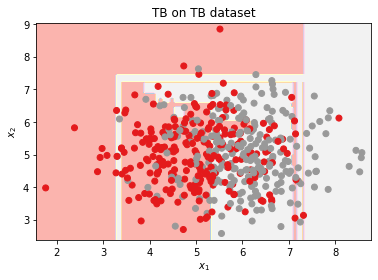

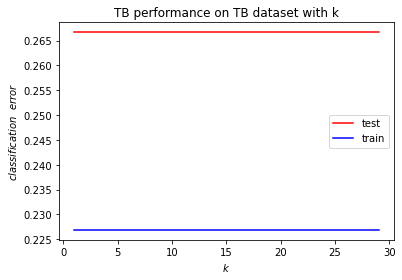

In [73]:
# TB

tboost = AdaC()
tboost.fit(tb_X_train, tb_y_train)
print('TB score on TB dataset: %.2f' % (tboost.score(tb_X_test, tb_y_test)))

plot_classifier_boundary(tboost, tb_X, tb_y, title='TB on TB dataset')

errors = map(lambda k: tb_classifier_score(k, tb_X_train, tb_y_train, tb_X_test, tb_y_test), k_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(k_values, test_error, train_error, 
title='TB performance on TB dataset with k', 
hyperparam='k')

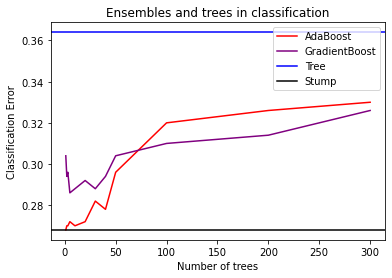

In [74]:

X = tb_X
y = tb_y
nfolds=5
RFfeat=int(np.sqrt(X.shape[1]))
ntree=np.array([1,2,3,5,10,20,30,40,50, 100, 200,300])

def score_gbc_class(m):
    model=GBC(n_estimators=m, learning_rate=0.1,max_depth=3)
    return np.mean(1-cross_val_score(model,X,y,cv=nfolds))

def score_ada_class(m):
    model=AdaC(n_estimators=m)
    return np.mean(1-cross_val_score(model,X,y,cv=nfolds))

def score_tree_class(depth=1):
    model=DTC(max_depth=depth)
    return np.mean(1-cross_val_score(model,X,y,cv=nfolds))


error_ada_class = list(map(score_ada_class,ntree))
error_gbc_class = list(map(score_gbc_class,ntree))

error_tree = score_tree_class(None)
error_decision_stump = score_tree_class(1)

error_decision_stump 

plt.plot(ntree,error_ada_class,color='red')
plt.plot(ntree,error_gbc_class,color='purple')
plt.axhline(error_tree, color='blue')
plt.axhline(error_decision_stump, color='black')
plt.legend(['AdaBoost','GradientBoost','Tree','Stump'])
plt.xlabel('Number of trees')
plt.ylabel('Classification Error')
plt.title('Ensembles and trees in classification');